In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Ещё больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from sklearn.preprocessing import OneHotEncoder # Для преобразования категориальных признаков в наборы бинарных
from sklearn.model_selection import train_test_split # Для разделения выборки на обучающую и тестовую
from sklearn.preprocessing import StandardScaler # Для нормализации числовых признаков

# Данные и задача
Датасет содержит данные сотрудников, для каждого из которых известны следующие признаки:
- *EmployeeID* - уникальный идентификатор сотрудника
- *recorddate_key* - год внесения записи
- *birthdate_key* - дата рождения
- *orighiredate_key* - дата найма
- *terminationdate_key* - дата увольнения
- *age* - возраст
- *length_of_service* - продолжительность работы (лет)
- *city_name* - город
- *department_name* - название отдела
- *job_title* - название работы
- *store_name* - идентификатор места работы
- *gender_short* - пол (сокращённо)
- *gender_full* - пол (целиком)
- *termreason_desc* - причина увольнения
- *termtype_desc* - тип увольнения
- *STATUS_YEAR* - год статуса
- *STATUS* - уволен или работает (это надо предсказывать)
- *BUSINESS_UNIT* - подразделение

Задача - предсказать, является сотрудник работающим (ACTIVE) или уволенным (TERMINATED).

In [2]:
data_raw = pd.read_csv('MFG10YearTerminationData.csv', delimiter=',')
data_raw.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [3]:
data_raw.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


In [4]:
data_raw.shape

(49653, 18)

In [5]:
data_raw.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

- Идентификатор EmployeeID не должен использоваться для обучения модели.
- Даты (recorddate_key, birthdate_key, orighiredate_key и terminationdate_key) нужно преобразовать из строк в дату и время.
- Возраст age можно определить, используя orighiredate_key и birthdate_key, значит, его тоже исключим из рассмотрения.
- Продолжительность работы (length_of_service) можно определить, используя дату записи и первоначальную дату найма, значит, этот столбец тоже исключим из рассмотрения.
- Если сотрудник ещё не уволен, в качестве даты увольнения используется 1/1/1900.
- store_name - идентификатор места работы - вряд ли является признаком, полезным для исследования. Исключим его тоже.
- gender_short можно убрать из рассмотрения, ведь это то же самое, что gender_full.
- Сотрудник, трудовая деятельность которого прекращена, имеет записи о дате увольнения, причине увольнения и типе увольнения. Эти 3 признака не следует использовать для обучения модели, ведь по ним можно однозначно сказать, что сотрудник уволен.
- recorddate_key и STATUS_YEAR - это одно и то же; можно удалить столбец recorddate_key.

In [6]:
data = data_raw.drop(['EmployeeID', 'recorddate_key', 'terminationdate_key', 'age',
                          'length_of_service', 'store_name', 'gender_short', 'termreason_desc', 'termtype_desc'], axis=1)
data['birthdate_key'] = pd.to_datetime(data['birthdate_key'])
data['orighiredate_key'] = pd.to_datetime(data['orighiredate_key'])
data

,birthdate_key,orighiredate_key,city_name,department_name,job_title,gender_full,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1954-01-03,1989-08-28,Vancouver,Executive,CEO,Male,2006,ACTIVE,HEADOFFICE
1,1954-01-03,1989-08-28,Vancouver,Executive,CEO,Male,2007,ACTIVE,HEADOFFICE
2,1954-01-03,1989-08-28,Vancouver,Executive,CEO,Male,2008,ACTIVE,HEADOFFICE
3,1954-01-03,1989-08-28,Vancouver,Executive,CEO,Male,2009,ACTIVE,HEADOFFICE
4,1954-01-03,1989-08-28,Vancouver,Executive,CEO,Male,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...
49648,1994-05-28,2013-08-19,Valemount,Dairy,Dairy Person,Male,2015,TERMINATED,STORES
49649,1994-06-13,2013-08-27,Vancouver,Customer Service,Cashier,Female,2013,TERMINATED,STORES
49650,1994-07-18,2013-09-15,White Rock,Customer Service,Cashier,Female,2015,TERMINATED,STORES
49651,1994-09-02,2013-10-09,Kelowna,Customer Service,Cashier,Female,2013,TERMINATED,STORES


In [7]:
# Настроим типы признаков
data['city_name'] = data['city_name'].astype('category')
data['department_name'] = data['department_name'].astype('category')
data['job_title'] = data['job_title'].astype('category')
data['gender_full'] = data['gender_full'].astype('category')
data['STATUS'] = data['STATUS'].astype('category')
data['BUSINESS_UNIT'] = data['BUSINESS_UNIT'].astype('category')

data.dtypes

birthdate_key       datetime64[ns]
orighiredate_key    datetime64[ns]
city_name                 category
department_name           category
job_title                 category
gender_full               category
STATUS_YEAR                  int64
STATUS                    category
BUSINESS_UNIT             category
dtype: object

### Числовые признаки (пропущенных значений нет):

In [8]:
data.describe()

,birthdate_key,orighiredate_key,STATUS_YEAR
count,49653,49653,49653.000000
mean,1969-01-09 21:03:12.495921696,2000-09-04 03:56:21.620445952,2010.612612
min,1941-01-15 00:00:00,1989-08-28 00:00:00,2006.000000
25%,1958-05-28 00:00:00,1995-06-02 00:00:00,2008.000000
50%,1968-12-04 00:00:00,2000-03-31 00:00:00,2011.000000
75%,1979-07-18 00:00:00,2005-10-13 00:00:00,2013.000000
max,1994-12-31 00:00:00,2013-12-11 00:00:00,2015.000000
std,NaN,NaN,2.845577


*min* – минимальное значение,  
*max* – максимальное значение,  
*mean* – среднее,  
*std* – среднеквадратическое отклонение,  
*25%* – первый квартиль – значение, ниже которого 25%,  
*50%* – медиана,  
*75%* – третий квартиль – значение, выше которого около 25%.

##### Корреляционная матрица:

In [9]:
corrMatrix = data.select_dtypes(include=['int64', 'datetime64']).corr()
corrMatrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,birthdate_key,orighiredate_key,STATUS_YEAR
birthdate_key,1.000000,0.951339,0.259756
orighiredate_key,0.951339,1.000000,0.214202
STATUS_YEAR,0.259756,0.214202,1.000000


Логично, что дата найма сильно зависит от даты рождения.

### Категориальные признаки (пропущенных значений нет):

In [10]:
data.describe(include=['category'])

,city_name,department_name,job_title,gender_full,STATUS,BUSINESS_UNIT
count,49653,49653,49653,49653,49653,49653
unique,40,21,47,2,2,2
top,Vancouver,Meats,Meat Cutter,Female,ACTIVE,STORES
freq,11211,10269,9984,25898,48168,49068


# Визуализация

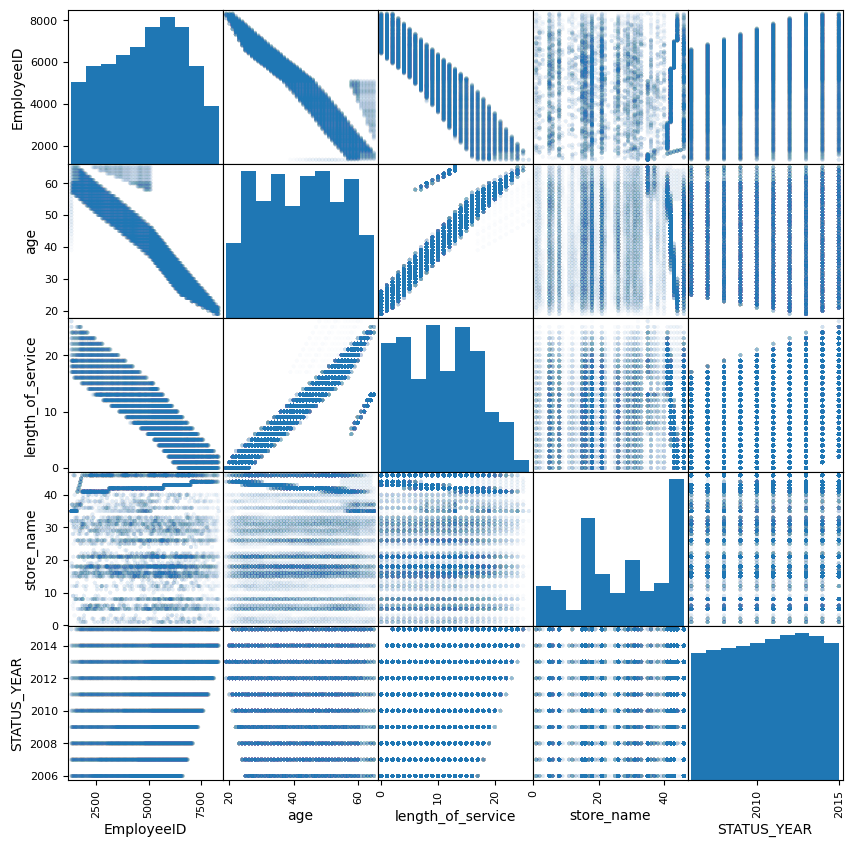

In [11]:
pd.plotting.scatter_matrix(data_raw, alpha = .01, figsize = (10, 10))
pass

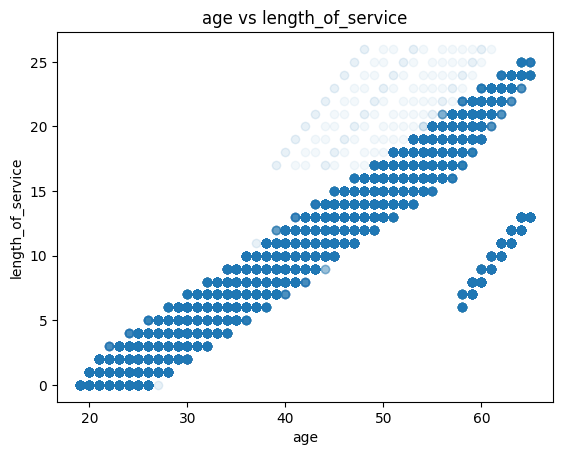

In [12]:
plt.plot(data_raw['age'], data_raw['length_of_service'], 'o', alpha = 0.05)
plt.xlabel('age')
plt.ylabel('length_of_service')
plt.title('age vs length_of_service')
pass

То есть, люди могут покинуть компанию, проработав любой срок от 0 до 25 лет и в любом возрасте от 20 до 65 лет. Люди возраста 57 лет и более, обычно покидают компанию, проработав от 5 до 14 лет.

### Выбросов в датасете не заявлено, т.к. он был сформирован искусственно.

# Категориальные признаки
Закодируем категориальные признаки с использованием OneHotEncoder числовыми признаками.

In [13]:
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(data[['city_name', 'department_name', 'job_title', 'gender_full', 'BUSINESS_UNIT']])

dummies = pd.DataFrame(enc.transform(data[['city_name', 'department_name', 'job_title', 'gender_full', 'BUSINESS_UNIT']]),
                       columns=enc.get_feature_names_out(), index=data.index)

In [14]:
data = pd.concat((data, dummies), axis=1).drop(['city_name', 'department_name', 'job_title', 'gender_full', 'BUSINESS_UNIT'], axis=1)
data

,birthdate_key,orighiredate_key,STATUS_YEAR,STATUS,city_name_Abbotsford,city_name_Aldergrove,city_name_Bella Bella,city_name_Blue River,city_name_Burnaby,city_name_Chilliwack,...,job_title_Recruiter,job_title_Shelf Stocker,job_title_Store Manager,job_title_Systems Analyst,job_title_Trainer,job_title_VP Finance,job_title_VP Human Resources,job_title_VP Stores,gender_full_Male,BUSINESS_UNIT_STORES
0,1954-01-03,1989-08-28,2006,ACTIVE,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1954-01-03,1989-08-28,2007,ACTIVE,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1954-01-03,1989-08-28,2008,ACTIVE,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1954-01-03,1989-08-28,2009,ACTIVE,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1954-01-03,1989-08-28,2010,ACTIVE,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,1994-05-28,2013-08-19,2015,TERMINATED,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
49649,1994-06-13,2013-08-27,2013,TERMINATED,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49650,1994-07-18,2013-09-15,2015,TERMINATED,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49651,1994-09-02,2013-10-09,2013,TERMINATED,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Разбиение выборки
Разобъём выборку на обучающую (80%) и тестовую (20%).

In [16]:
data['birthdate_key'] = data['birthdate_key'].astype('int64') / 10**9
data['orighiredate_key'] = data['orighiredate_key'].astype('int64') / 10**9

y = data['STATUS']
data = data.drop(columns=['STATUS'])
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.20, random_state = 777)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(39722, 9931)

### Нормализация числовых признаков не требуется. Будем использовать случайный лес.


# Случайный лес


In [19]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0001258748300689794 0.017420199375692277


#### Подбор гиперпараметров не требуется, результаты и так впечатляющие.

# Итоги
#### Матрица рассогласования:

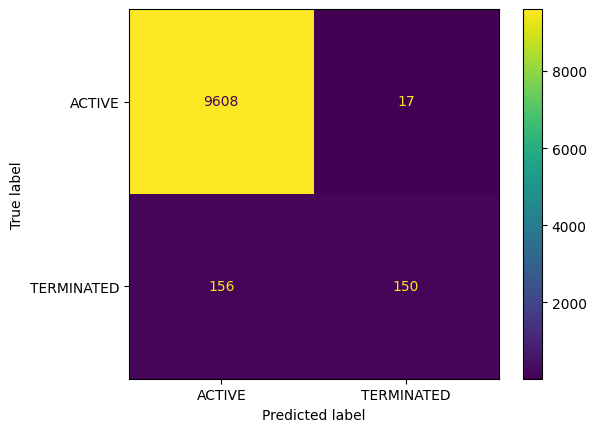

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

Ввиду дисбаланса классов мы получили довольно странную картину. В тестовой выборке было очень мало уволенных работников, но примерно половина из них была отнесена классификатором к работающим. Дисбаланс классов - существенная проблема нашего датасета. Поскольку и в обучающей выборке было довольно мало уволенных работников, то мы не получили хорошего результата в плане определения уволенных работников.